                                        Electric Vehicle Sales by State in India

Reading Data and Basic Stats

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from ydata_profiling import ProfileReport
import ydata_profiling
import statsmodels.api as sm

In [5]:
# Load the dataset
df = pd.read_csv('ev.csv')

In [6]:
# Display the first few rows of the dataset
print(df.head())

     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  


In [7]:
print(df.tail())

         Year Month_Name       Date                     State  \
96840  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96841  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96842  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96843  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96844  2023.0        dec  12/1/2023  Andaman & Nicobar Island   

                           Vehicle_Class Vehicle_Category Vehicle_Type  \
96840                          MOTOR CAR       4-Wheelers  4W_Personal   
96841  MOTOR CYCLE/SCOOTER-USED FOR HIRE       2-Wheelers    2W_Shared   
96842                           OMNI BUS              Bus          Bus   
96843              THREE WHEELER (GOODS)       3-Wheelers     3W_Goods   
96844          THREE WHEELER (PASSENGER)       3-Wheelers    3W_Shared   

       EV_Sales_Quantity  
96840                1.0  
96841                5.0  
96842                0.0  
96843                0.0  
96844                0.0  


In [90]:
print(df.describe())

               Year                           Date  EV_Sales_Quantity
count  96845.000000                          96845       96845.000000
mean    2018.622768  2019-01-28 11:00:33.641385728          37.108896
min     2014.000000            2014-01-01 00:00:00           0.000000
25%     2016.000000            2016-08-01 00:00:00           0.000000
50%     2019.000000            2019-02-01 00:00:00           0.000000
75%     2021.000000            2021-09-01 00:00:00           0.000000
max     2024.000000            2024-01-01 00:00:00       20584.000000
std        2.895581                            NaN         431.566675


Data Cleaning

In [9]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Check for missing values
print(df.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [54]:
# Fill missing values (if any) using median for numericalcolumns or mode for categorical columns
df['EV_Sales_Quantity'] = df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median())

Data Visualisation

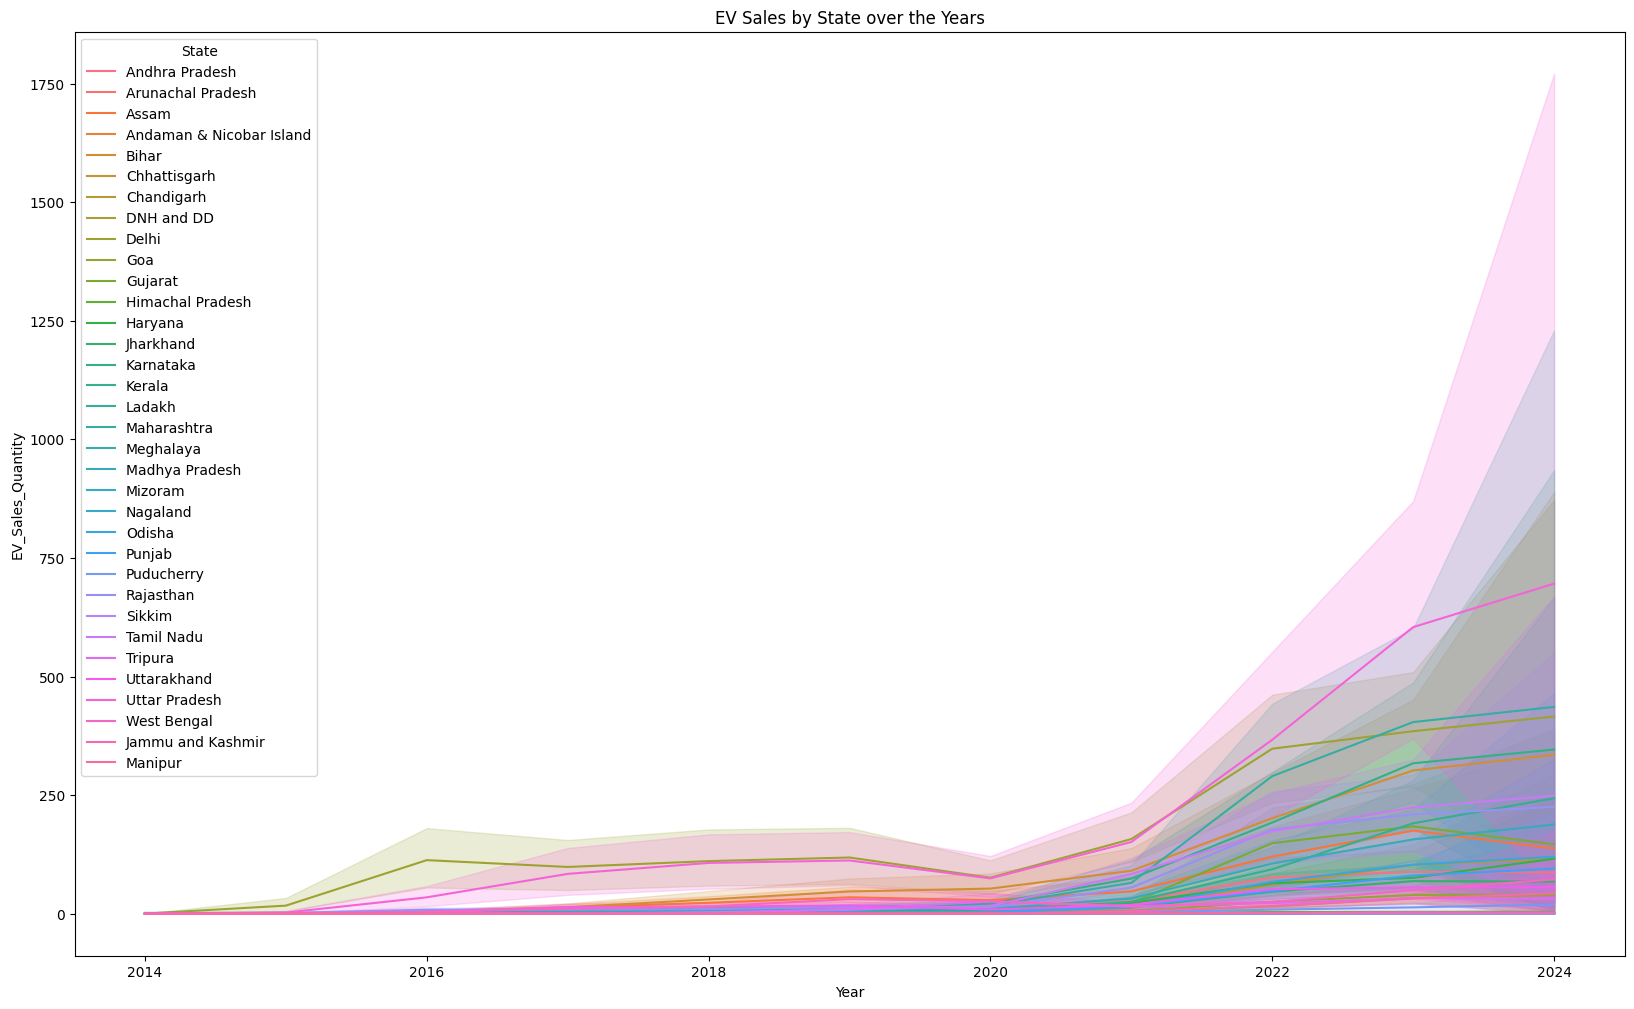

In [55]:
# Plot EV sales over the years
plt.figure(figsize=(20,12))
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity', hue='State')
plt.title('EV Sales by State over the Years')
plt.show()

<Axes: xlabel='Vehicle_Category', ylabel='EV_Sales_Quantity'>

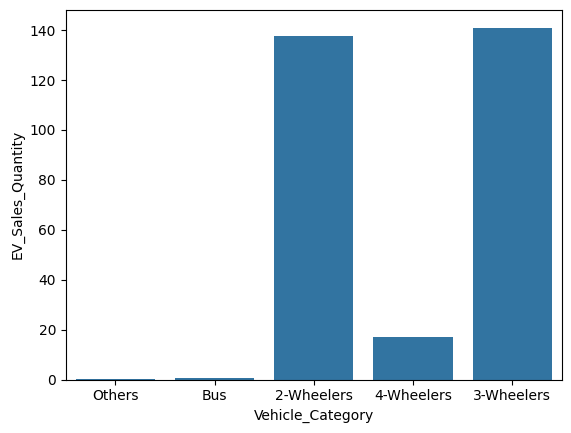

In [77]:
# Plot sales by vehicle category
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df, errorbar=None)

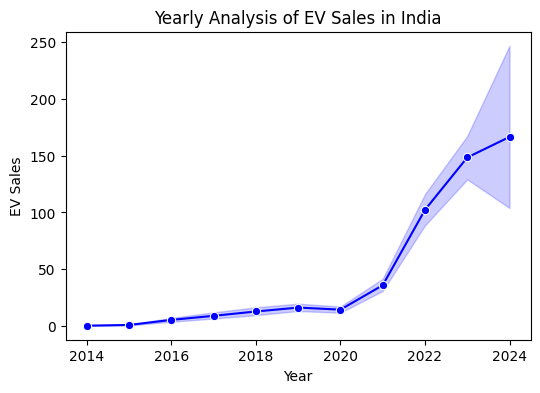

In [57]:
# ploting lineplot for Yearly Analysis of EV Sales in India
plt.figure(figsize=(6, 4))
plt.title('Yearly Analysis of EV Sales in India')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('EV Sales');

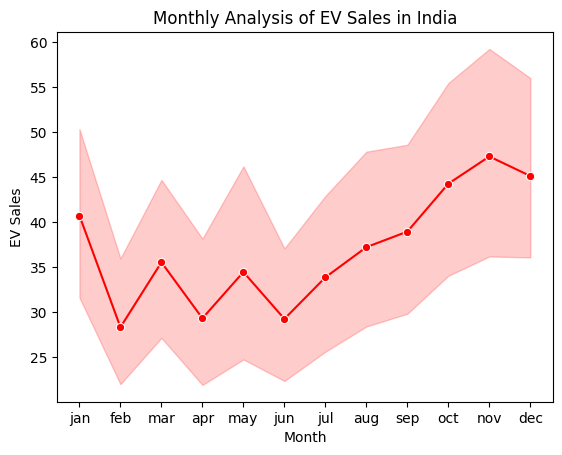

In [58]:
# ploting lineplot for Monthly Analysis of EV Sales in India
plt.title('Monthly Analysis of EV Sales in India')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df, marker='o', color='r')
plt.xlabel('Month')
plt.ylabel('EV Sales');

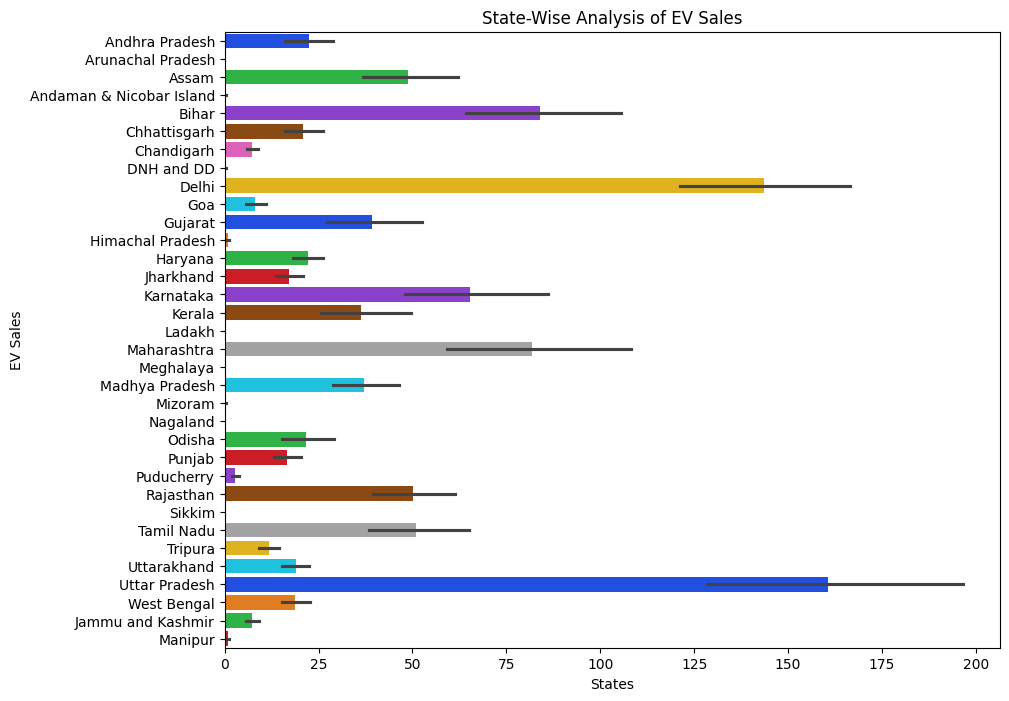

In [59]:
# ploting bar graph for State-Wise Analysis of EV Sales
plt.figure(figsize=(10,8))
plt.title('State-Wise Analysis of EV Sales')
sns.barplot(y='State', x='EV_Sales_Quantity', data=df, hue='State', palette='bright')
plt.xlabel('States')
plt.ylabel('EV Sales');

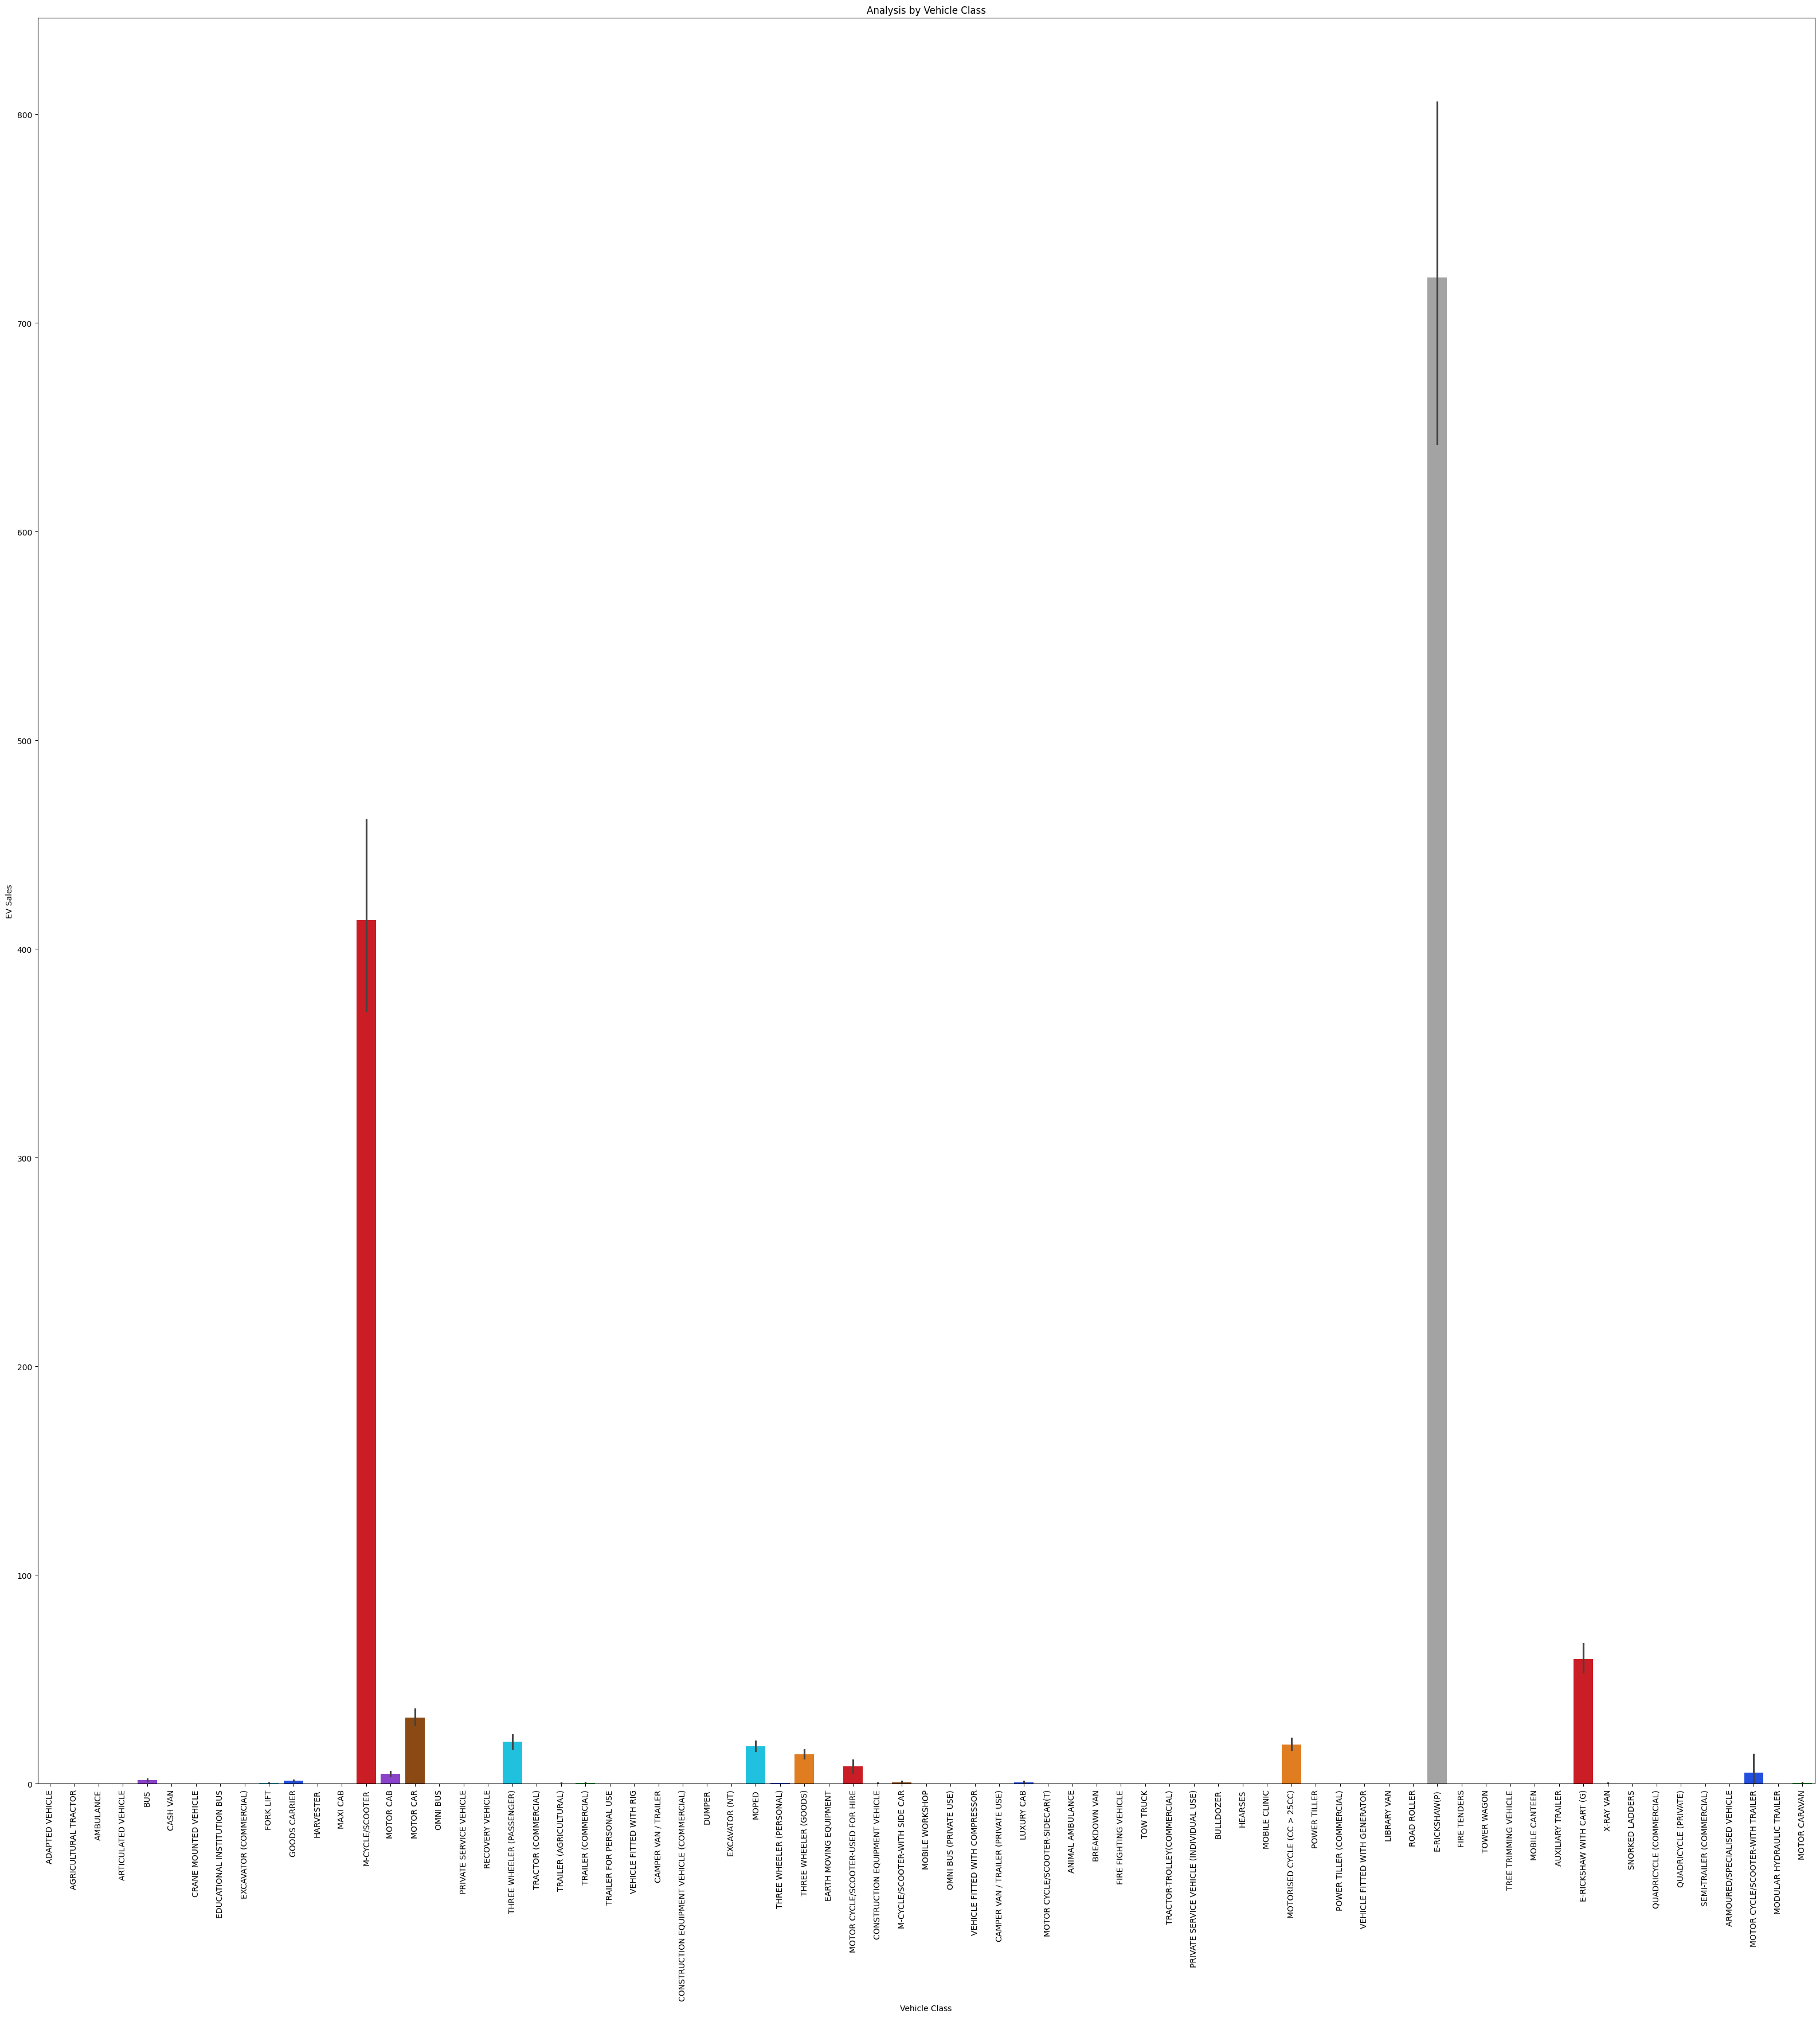

In [60]:
# ploting bar graph for Analysis by Vehicle Class
plt.figure(figsize=(40,40))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity',data=df, hue='Vehicle_Class', palette='bright')
plt.title('Analysis by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);

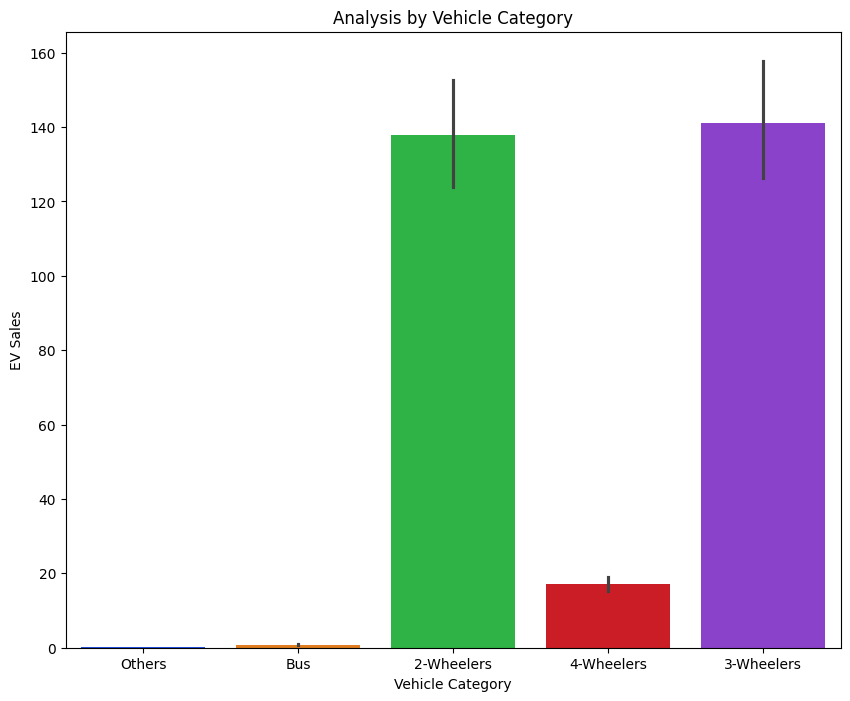

In [61]:
# ploting barplot for Analysis by Vehicle Category
plt.figure(figsize=(10,8))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity',data=df, hue='Vehicle_Category', palette='bright')
plt.title('Analysis by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.xticks(rotation=0);

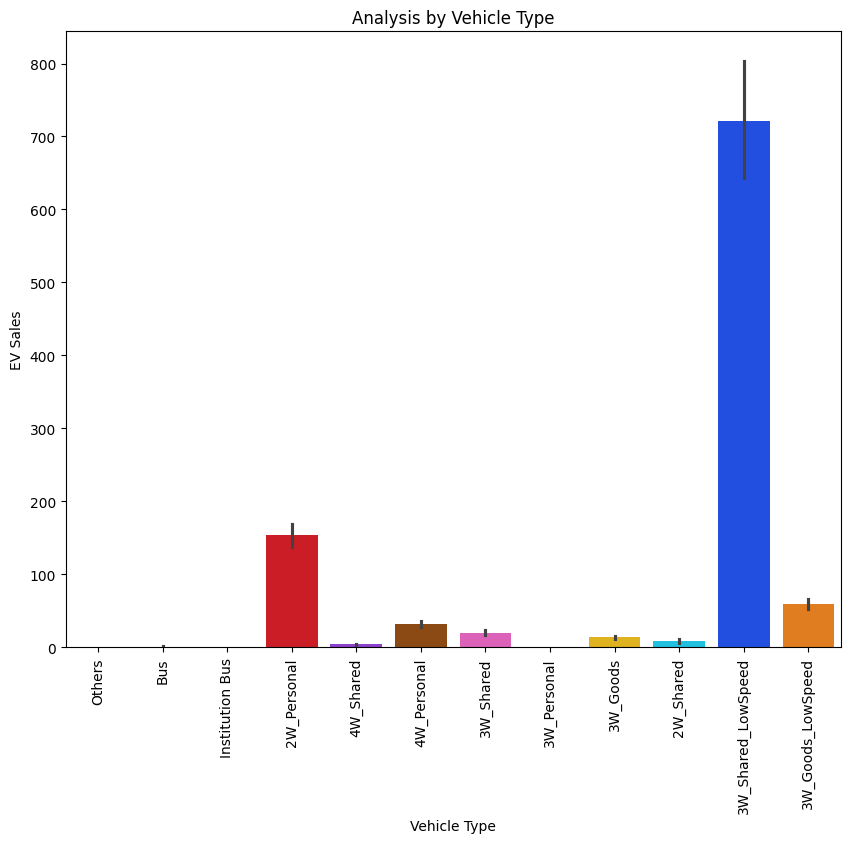

In [62]:
# ploting barplot for Analysis by Vehicle Type
plt.figure(figsize=(10,8))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity',data=df, hue='Vehicle_Type', palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);

Regression Analysis

In [65]:
df = df.dropna()

In [66]:
# selecting the data
X = df[['EV_Sales_Quantity']]  # Replace with your actual predictor columns
y = df['EV_Sales_Quantity']  # Replace with your actual target variable

In [67]:
# Add constant for intercept
X = sm.add_constant(X)

In [68]:
# Fit the model
model = sm.OLS(y, X).fit()

In [69]:
# Summary of regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      EV_Sales_Quantity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.158e+30
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:43:23   Log-Likelihood:             2.1012e+06
No. Observations:               96845   AIC:                        -4.202e+06
Df Residuals:                   96843   BIC:                        -4.202e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.863e-12   2.95e-1

C:\Users\pushy\anaconda3\envs\notebook\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


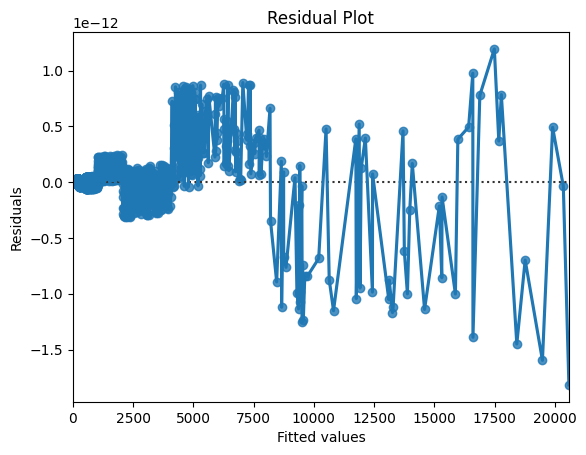

In [70]:
# Visualize residuals
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [73]:
# Add constant to both training and testing sets
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [74]:
# Fit model on training data
model = sm.OLS(y_train, X_train_const).fit()

In [75]:
# Predict on test set
y_pred = model.predict(X_test_const)

In [88]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.6285764374343546e-20


In [76]:
# Evaluate predictions (e.g., using R²)
from sklearn.metrics import r2_score
print("Test R²:", r2_score(y_test, y_pred))

Test R²: 1.0


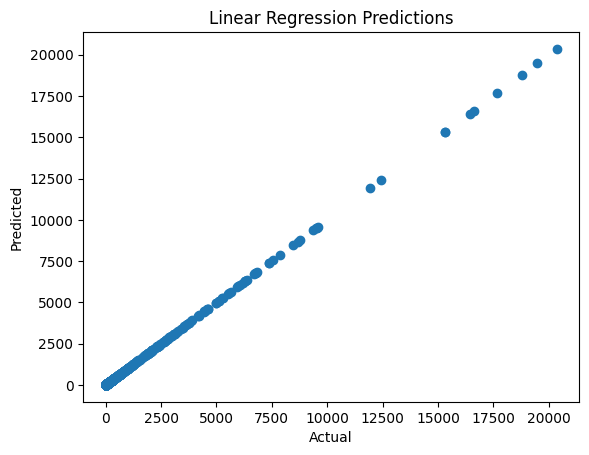

In [89]:
# ploting scatterplot for Linear Regression Predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression Predictions")
plt.show()

Summary

In [63]:
# generating summary
profile= ProfileReport(df, title='Electric Vehicle Sales by State in India')

In [64]:
# summary
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/8 [00:00<?, ?it/s]
%|█▎        | 1/8 [00:00<00:05,  1.36it/s]
%|██▌       | 2/8 [00:01<00:03,  1.90it/s]
100%|██████████| 8/8 [00:01<00:00,  5.34it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
# generating summary report
summary_report = {
    "Mean EV Sales": df["EV_Sales_Quantity"].mean(),
    "Median EV Sales": df["EV_Sales_Quantity"].median(),
    "Top 10 EV States": df.nlargest(10, "EV_Sales_Quantity")["State"].tolist()
}

In [87]:
# summary
print(summary_report)

{'Mean EV Sales': np.float64(37.10889565801022), 'Median EV Sales': np.float64(0.0), 'Top 10 EV States': ['Uttar Pradesh', 'Uttar Pradesh', 'Maharashtra', 'Uttar Pradesh', 'Uttar Pradesh', 'Maharashtra', 'Uttar Pradesh', 'Uttar Pradesh', 'Uttar Pradesh', 'Uttar Pradesh']}
